In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option('display.max_rows', 15)

In [3]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/HIST_PAINEL_COVIDBR_04ago2020.xlsx'

In [4]:
#df = pd.read_excel('HIST_PAINEL_COVIDBR_04ago2020.xlsx')

In [5]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0000,0,4,city,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0000,0,5,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481822,Tocantínia,1721109.0,2020-08-04,32,7545.0,False,True,222,2942.34592,2020-08-03,0.0180,4,78,city,TO,0,0
481823,Tupirama,1721257.0,2020-08-04,32,1891.0,False,True,23,1216.28768,2020-08-03,0.0435,1,74,city,TO,0,0
481824,Tupiratins,1721307.0,2020-08-04,32,2671.0,False,True,6,224.63497,2020-08-03,0.0000,0,74,city,TO,0,0
481825,Wanderlândia,1722081.0,2020-08-04,32,11683.0,False,True,158,1352.39236,2020-08-03,0.0316,5,99,city,TO,0,0


In [6]:
# list(df.columns)

In [7]:
df = df.loc[:,['date', 'state', 'city', 'estimated_population_2019', 'last_available_confirmed', 'last_available_deaths', 'new_confirmed', 'new_deaths']]
df

,date,state,city,estimated_population_2019,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths
0,2020-02-25,SP,São Paulo,12252023.0,1,0,1,0
2,2020-02-26,SP,São Paulo,12252023.0,1,0,0,0
4,2020-02-27,SP,São Paulo,12252023.0,1,0,0,0
6,2020-02-28,SP,São Paulo,12252023.0,2,0,1,0
8,2020-02-29,SP,São Paulo,12252023.0,2,0,0,0
...,...,...,...,...,...,...,...,...
481822,2020-08-04,TO,Tocantínia,7545.0,222,4,0,0
481823,2020-08-04,TO,Tupirama,1891.0,23,1,0,0
481824,2020-08-04,TO,Tupiratins,2671.0,6,0,0,0
481825,2020-08-04,TO,Wanderlândia,11683.0,158,5,0,0


In [8]:
cities = set(df.loc[:, 'city'].values)

In [9]:
brStates = sorted(set(df.loc[:, 'state'].values))

In [10]:
yesterday = pd.to_datetime('today') - pd.Timedelta(days=1)
yesterday

Timestamp('2020-08-04 18:32:05.866084')

In [11]:
dfToday = df[df['date'] > (pd.to_datetime("today") - pd.to_timedelta('2days'))]
dfToday

,date,state,city,estimated_population_2019,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths
476323,2020-08-04,AC,Acrelândia,15256.0,293,7,6,0
476324,2020-08-04,AC,Assis Brasil,7417.0,349,8,9,0
476325,2020-08-04,AC,Brasiléia,26278.0,834,12,2,1
476326,2020-08-04,AC,Bujari,10266.0,329,5,4,0
476327,2020-08-04,AC,Capixaba,11733.0,226,7,11,0
...,...,...,...,...,...,...,...,...
481822,2020-08-04,TO,Tocantínia,7545.0,222,4,0,0
481823,2020-08-04,TO,Tupirama,1891.0,23,1,0,0
481824,2020-08-04,TO,Tupiratins,2671.0,6,0,0,0
481825,2020-08-04,TO,Wanderlândia,11683.0,158,5,0,0


In [12]:
df.loc[df['state'] == brStates[25], 'last_available_confirmed'].sum()

22787241

In [13]:
df = df.loc[:,['date', 'state', 'city', 'new_confirmed', 'new_deaths']]
df

,date,state,city,new_confirmed,new_deaths
0,2020-02-25,SP,São Paulo,1,0
2,2020-02-26,SP,São Paulo,0,0
4,2020-02-27,SP,São Paulo,0,0
6,2020-02-28,SP,São Paulo,1,0
8,2020-02-29,SP,São Paulo,0,0
...,...,...,...,...,...
481822,2020-08-04,TO,Tocantínia,0,0
481823,2020-08-04,TO,Tupirama,0,0
481824,2020-08-04,TO,Tupiratins,0,0
481825,2020-08-04,TO,Wanderlândia,0,0


In [36]:
sumCases = df.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,state,new_confirmed,new_deaths
0,SP,575529,23701
1,CE,178212,7819
2,BA,171051,3655
3,RJ,168920,13716
4,PA,160700,5817
...,...,...,...
22,AP,36639,571
23,RR,32632,528
24,MS,27691,432
25,TO,27683,408


In [37]:
sumCases.loc[sumCases['new_confirmed'] <= 150000, ['state']] = 'Other_States'

In [39]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,state,new_confirmed,new_deaths
0,Other_States,1494556,39981
1,SP,575529,23701
2,CE,178212,7819
3,BA,171051,3655
4,RJ,168920,13716
5,PA,160700,5817


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d5277e10>,
      dtype=object)

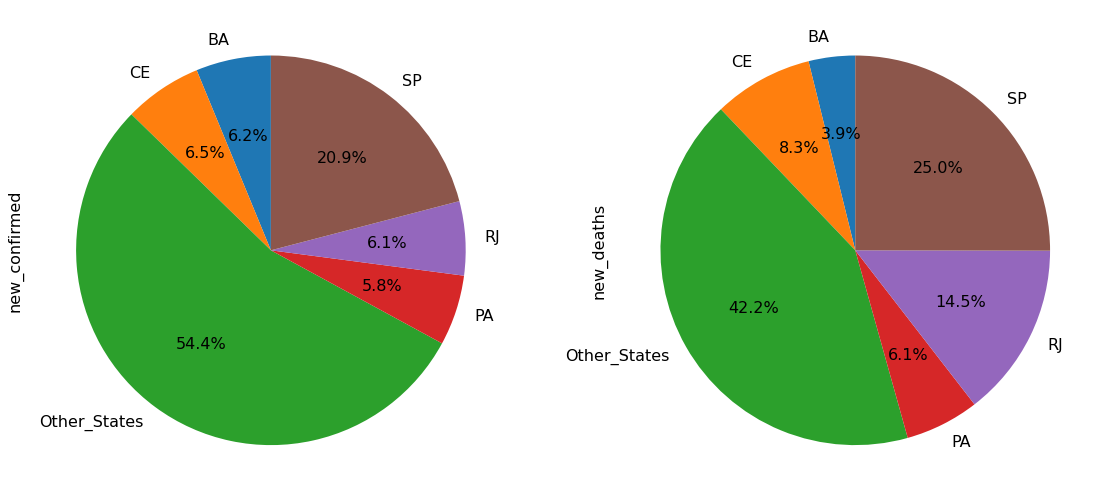

In [64]:
sumCases.groupby(['state']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [22]:
# sumCases.loc['Total',:]= sumCases.sum(axis=0)

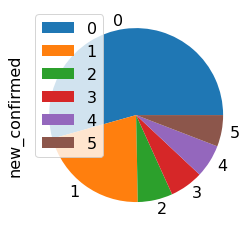

In [32]:
sumCases.plot(kind='pie', y='new_confirmed')

NameError: name 'state' is not defined

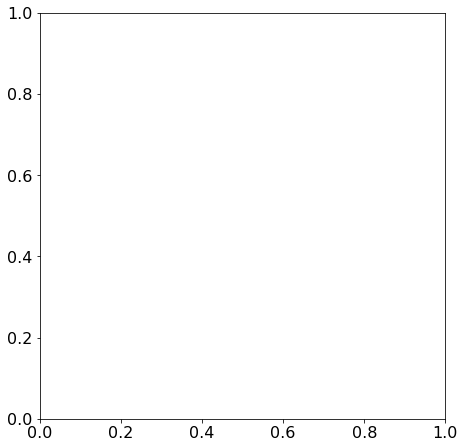

In [29]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
sumCases.plot(kind='pie', y = '', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)


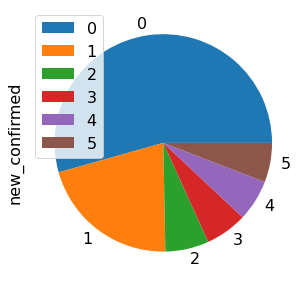

In [27]:
plot = sumCases.plot.pie(y='new_confirmed', figsize=(5, 5))

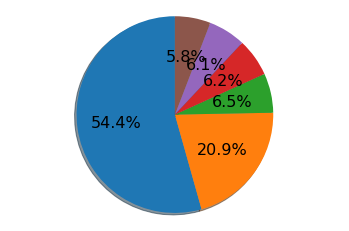

In [23]:
fig1, ax1 = plt.subplots()
ax1.pie(sumCases.new_confirmed, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()